# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Откроем файлы и запишем датасеты в переменные data_1, data_2 и data_3
try:
    data_1 = pd.read_csv('/datasets/geo_data_0.csv')
    data_2 = pd.read_csv('/datasets/geo_data_1.csv')
    data_3 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    data_1 = pd.read_csv('geo_data_0.csv')
    data_2 = pd.read_csv('geo_data_1.csv')
    data_3 = pd.read_csv('geo_data_2.csv')

In [3]:
# Посмотрим первые 10 строк первого региона
data_1.head(10)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [4]:
# Посмотрим первые 10 строк второго региона
data_2.head(10)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [5]:
# Посмотрим первые 10 строк третьего региона
data_3.head(10)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


In [6]:
# Выведем общую информацию о датафрейме data1
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
# Выведем общую информацию о датафрейме data2
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
# Выведем общую информацию о датафрейме data3
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [10]:
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [11]:
data_3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


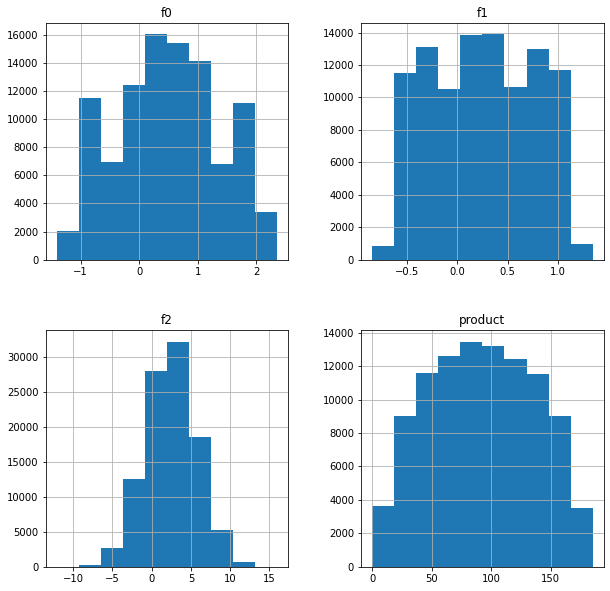

In [12]:
# Построим общую гистограмму для всех числовых столбцов первого региона
data_1.hist(figsize=(10, 10))
plt.show()

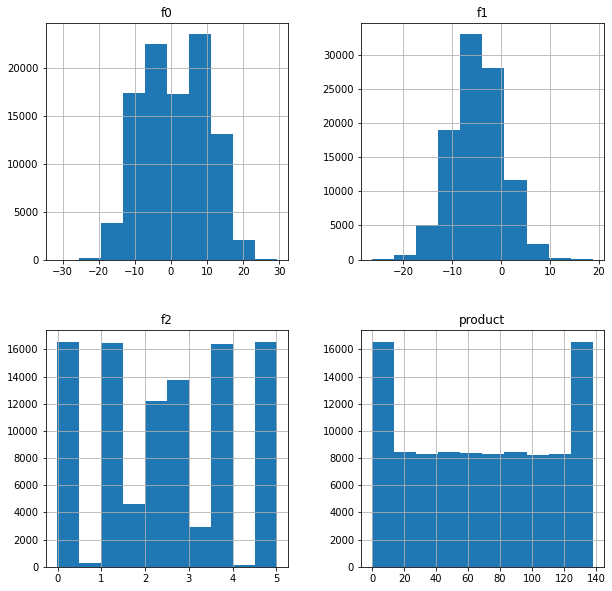

In [13]:
# Построим общую гистограмму для всех числовых столбцов второго региона
data_2.hist(figsize=(10, 10))
plt.show()

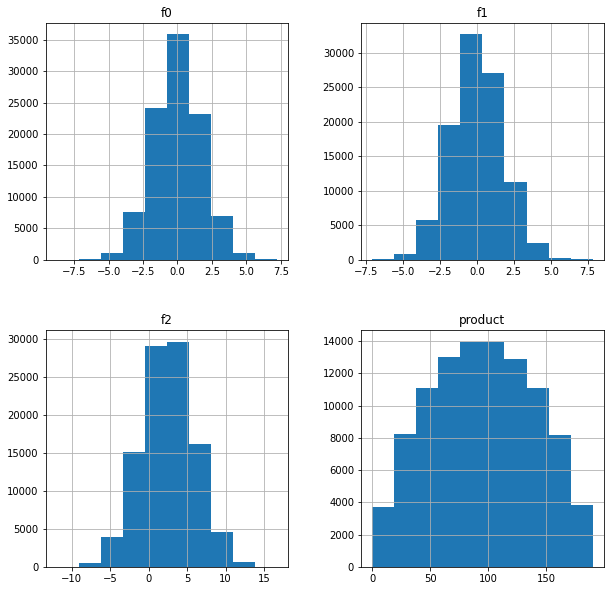

In [31]:
# Построим общую гистограмму для всех числовых столбцов третьего региона
data_3.hist(figsize=(10, 10))
plt.show()

In [15]:
# Проверим на наличие дубликатов
print('Количество дубликатов в таблице data_1', data_1.duplicated().sum())
print('Количество дубликатов в таблице data_2', data_2.duplicated().sum())
print('Количество дубликатов в таблице data_3', data_3.duplicated().sum())

Количество дубликатов в таблице data_1 0
Количество дубликатов в таблице data_2 0
Количество дубликатов в таблице data_3 0


In [16]:
# Проверим на наличие одинаковых id data1
print('Количество дубликатов id в таблице data_1', data_1['id'].duplicated().sum())
print('Количество дубликатов id в таблице data_2', data_2['id'].duplicated().sum())
print('Количество дубликатов id в таблице data_3', data_3['id'].duplicated().sum())

Количество дубликатов id в таблице data_1 10
Количество дубликатов id в таблице data_2 4
Количество дубликатов id в таблице data_3 4


В данных есть записи с одинаковыми id. Удалим их, так как причина их происхождения не ясна, а их количество менее 0.1%

In [17]:
data_1.drop_duplicates('id', inplace=True)
data_2.drop_duplicates('id', inplace=True)
data_3.drop_duplicates('id', inplace=True)

In [18]:
print('Количество строк после удаления дубликатов в таблице data_1', data_1.shape[0])
print('Количество строк после удаления дубликатов в таблице data_2', data_2.shape[0])
print('Количество строк после удаления дубликатов в таблице data_3', data_3.shape[0])

Количество строк после удаления дубликатов в таблице data_1 99990
Количество строк после удаления дубликатов в таблице data_2 99996
Количество строк после удаления дубликатов в таблице data_3 99996


Удалим из всех таблиц столбец id, так как он уникален для каждой скважины и не нужен для обучения модели.

In [19]:
data_1.drop(['id'], axis=1, inplace=True)
data_2.drop(['id'], axis=1, inplace=True)
data_3.drop(['id'], axis=1, inplace=True)

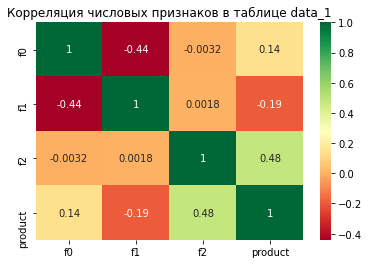

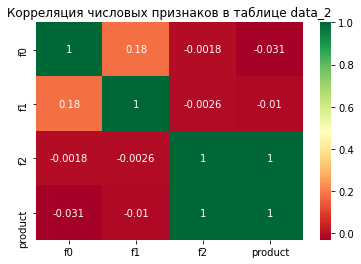

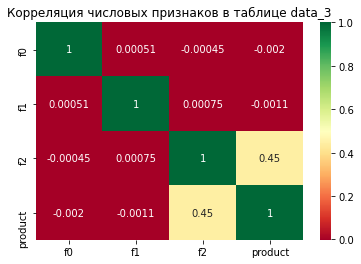

In [20]:
# Проверим корреляцию признаков в таблицах
sns.heatmap(data_1.corr(), cmap='RdYlGn',annot=True)
plt.title('Корреляция числовых признаков в таблице data_1')
plt.show()
sns.heatmap(data_2.corr(), cmap='RdYlGn', annot=True)
plt.title('Корреляция числовых признаков в таблице data_2')
plt.show()
sns.heatmap(data_3.corr(), cmap='RdYlGn', annot=True)
plt.title('Корреляция числовых признаков в таблице data_3')
plt.show()

***Вывод:*** Файлы содержат 100000 записей. Количество значений в столбцах совпадает, что говорит о том, что нет пропущенных значений. Наименования столбцов корректны. Построена общая гистограмма для всех числовых столбцов таблицы. Построены таблицы корреляции. Выполнена предобработка данных: удалены дубликаты, столбец id.

## Обучение и проверка модели

In [21]:
# Напишем функцию для обучения и проверки модели
def model_check(data):
    # Выделим признаки
    features = data.drop('product', axis=1)
    target = data['product']

    # Разделим датафрейм на обучающую и валидационную выборки
    features_train, features_valid, target_train, target_valid = train_test_split(features,
                                                                                  target,
                                                                                  test_size=0.25,
                                                                                  random_state=12345)
    # Посмотрим на размерность сформированных наборов данных
    print('Размерность набора данных features_train: ', features_train.shape)
    print('Размерность набора данных target_train: ', target_train.shape)
    print('Размерность набора данных features_valid: ', features_valid.shape)
    print('Размерность набора данных target_valid: ', target_valid.shape)
    print(' ')
    
    # Обучаем модель и сохраняем результат
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)

    predictions_mean = predictions.mean()
    rmse = mean_squared_error(target_valid, predictions) ** 0.5
    return target_valid, predictions, predictions_mean, rmse

In [22]:
# Используя функцию обучим и проверим модели
target_valid_1, predictions_1, predictions_mean_1, rmse_1 = model_check(data_1)
target_valid_2, predictions_2, predictions_mean_2, rmse_2 = model_check(data_2)
target_valid_3, predictions_3, predictions_mean_3, rmse_3 = model_check(data_3)

Размерность набора данных features_train:  (74992, 3)
Размерность набора данных target_train:  (74992,)
Размерность набора данных features_valid:  (24998, 3)
Размерность набора данных target_valid:  (24998,)
 
Размерность набора данных features_train:  (74997, 3)
Размерность набора данных target_train:  (74997,)
Размерность набора данных features_valid:  (24999, 3)
Размерность набора данных target_valid:  (24999,)
 
Размерность набора данных features_train:  (74997, 3)
Размерность набора данных target_train:  (74997,)
Размерность набора данных features_valid:  (24999, 3)
Размерность набора данных target_valid:  (24999,)
 


In [23]:
# Посмотрим результаты
print('Средний запас предсказанного сырья features_train_1: ', predictions_mean_1)
print('RMSE target_train_1: ', rmse_1)
print(' ')
print('Средний запас предсказанного сырья features_train_2: ', predictions_mean_2)
print('RMSE target_train_2: ', rmse_2)
print(' ')
print('Средний запас предсказанного сырья features_train_3: ', predictions_mean_3)
print('RMSE target_train_3: ', rmse_3)

Средний запас предсказанного сырья features_train_1:  92.78915638280621
RMSE target_train_1:  37.853527328872964
 
Средний запас предсказанного сырья features_train_2:  69.17831957030432
RMSE target_train_2:  0.892059264771703
 
Средний запас предсказанного сырья features_train_3:  94.86572480562035
RMSE target_train_3:  40.07585073246016


***Вывод:*** Данные разделены на тестовые и валидационные выборки. Проверен размерность выборок. Обучены и проверены модели для каждого региона. Лучший параметр RMSE показывает модель на 2 регионе. Но в этом регионе запас предсказанного сырья меньше всего.

## Подготовка к расчёту прибыли

In [24]:
# Количество скважин при разведке
WELLS_TOTAL = 500

# Количество лучших скважин
WELLS_BEST = 200

# Бюджет в регионе (в тыс. руб.)
BUDGET_REGION = 10_000_000

# Бюджет на одну скважину
BUDGET_WELL = BUDGET_REGION/WELLS_BEST
print('Бюджет на разработку одной скважины: ', BUDGET_WELL)

# Доход с каждой единицы продукта 
PRODUCT_INCOME = 450

# Минимальная добыча с одной скважины
BARREL_WELL = BUDGET_WELL / PRODUCT_INCOME
print('Минимальная добыча с одной скважины: {:.2f}'.format(BARREL_WELL))

# Минимальная добыча с региона
REGION_INCOME = WELLS_BEST * BARREL_WELL
print('Минимальная добыча с одного региона: {:.2f}'.format(REGION_INCOME))

Бюджет на разработку одной скважины:  50000.0
Минимальная добыча с одной скважины: 111.11
Минимальная добыча с одного региона: 22222.22


In [25]:
# Средний объем запасов скважины
print('Средний объем запасов скважины в первом регионе: ', data_1['product'].mean())
print('Средний объем запасов скважины во втором регионе: ', data_2['product'].mean())
print('Средний объем запасов скважины в третьем регионе: ', data_3['product'].mean())

Средний объем запасов скважины в первом регионе:  92.49968421774354
Средний объем запасов скважины во втором регионе:  68.82391591804064
Средний объем запасов скважины в третьем регионе:  94.99834211933378


***Вывод:*** Во всех регионах средний объем запасов скаважины меньше минимальной добычи с одной скважины.

## Расчёт прибыли и рисков 

In [26]:
# Функция для расчета прибыли
def profit(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    income_top = PRODUCT_INCOME * selected.sum()
    
    return income_top - BUDGET_REGION

In [27]:
# Применим технику Bootstrap
def bootstrap(target, predictions):

    state = np.random.RandomState(12345)
    # Количество повторений цикла
    bootstrap_samples = 1000
    
    values = []
    target = target.reset_index(drop=True)
    # Счетчик убыточных скважин
    count = 0
    
    for i in range(bootstrap_samples):
        target_subsample = target.sample(n=500, replace=True, random_state=state) 
        probs_subsample = pd.Series(predictions)[target_subsample.index]
        income = profit(target_subsample, probs_subsample, 200)
     
        
        if income < 0:
            count += 1
        values.append(income)
                
    values = pd.Series(values)
    lower = values.quantile(0.025) 
    upper = values.quantile(0.975) 
    income_mean = values.mean()
    # Процент убыточных скважин
    risk = (count / bootstrap_samples) * 100
    return lower, upper, income_mean, risk

In [28]:
lower_1, upper_1, income_mean_1, risk_1 = bootstrap(target_valid_1, predictions_1)
lower_2, upper_2, income_mean_2, risk_2 = bootstrap(target_valid_2, predictions_2)
lower_3, upper_3, income_mean_3, risk_3 = bootstrap(target_valid_3, predictions_3)

In [29]:
print('''
Первый регион:
   Средняя прибыль = {}
   Доверительный интервал (начало) = {}
   Доверительный интервал (конец) = {}
   Риск убытков = {} '''.format(income_mean_1,
                             lower_1,
                             upper_1,
                             risk_1,
                            ))

print('''
Второй регион:
   Средняя прибыль = {}
   Доверительный интервал (начало) = {}
   Доверительный интервал (конец) = {}
   Риск убытков = {} '''.format(income_mean_2,
                             lower_2,
                             upper_2,
                             risk_2,
                            ))

print('''
Третий регион:
   Средняя прибыль = {}
   Доверительный интервал (начало) = {}
   Доверительный интервал (конец) = {}
   Риск убытков = {} '''.format(income_mean_3,
                             lower_3,
                             upper_3,
                             risk_3,
                            ))


Первый регион:
   Средняя прибыль = 409428.038621436
   Доверительный интервал (начало) = -131536.02870166398
   Доверительный интервал (конец) = 944395.5827546729
   Риск убытков = 7.1 

Второй регион:
   Средняя прибыль = 536902.5874874532
   Доверительный интервал (начало) = 114527.9029023855
   Доверительный интервал (конец) = 970787.9109953713
   Риск убытков = 0.8999999999999999 

Третий регион:
   Средняя прибыль = 353790.362730942
   Доверительный интервал (начало) = -159194.0311913273
   Доверительный интервал (конец) = 875652.5028711314
   Риск убытков = 10.2 


***Вывод:*** Самым выгодным для разработки является второй регион. Средняя прибыль в этом регионе наибольшая (536902 тыс. руб.). С вероятностью 95% прибыль окажется в промежутке от 114527 до 970787 тыс. руб. Риски убытков в этом регионе самые низкие (всего 0.9%).